# HTX Hackathon Use Case - San Francisco Crime Data

Data Source from [Kaggle](https://www.kaggle.com/c/sf-crime)

From 1934 to 1963, San Francisco was infamous for housing some of the world's most notorious criminals on the inescapable island of Alcatraz.

Today, the city is known more for its tech scene than its criminal past. But, with rising wealth inequality, housing shortages, and a proliferation of expensive digital toys riding BART to work, there is no scarcity of crime in the city by the bay.

From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = os.path.join(os.environ["HOME"], "Datasets","HTX_Hackathon","San_Francisco_Crimes")

# Read Data

In [3]:
sfcrime = pd.read_csv(os.path.join(DATA_DIR, "SF_Crimes.csv"))
sfcrime.rename(columns = {"X":"LON","Y":"LAT"}, inplace = True)
sfcrime["DayOfWeek"] = sfcrime["DayOfWeek"].str.upper()

display(sfcrime.shape)
display(sfcrime.head(10))

(878049, 9)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,LON,LAT
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,WEDNESDAY,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,WEDNESDAY,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,WEDNESDAY,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


# Unique Values

In [4]:
def unique_vals(col_name):
    valcnt = sfcrime[col_name].value_counts().reset_index()
    valcnt.columns = [col_name,"Count"]
    return valcnt

In [5]:
unique_vals("Category")

,Category,Count
0,LARCENY/THEFT,174900
1,OTHER OFFENSES,126182
2,NON-CRIMINAL,92304
3,ASSAULT,76876
4,DRUG/NARCOTIC,53971
5,VEHICLE THEFT,53781
6,VANDALISM,44725
7,WARRANTS,42214
8,BURGLARY,36755
9,SUSPICIOUS OCC,31414


In [6]:
unique_vals("PdDistrict")

,PdDistrict,Count
0,SOUTHERN,157182
1,MISSION,119908
2,NORTHERN,105296
3,BAYVIEW,89431
4,CENTRAL,85460
5,TENDERLOIN,81809
6,INGLESIDE,78845
7,TARAVAL,65596
8,PARK,49313
9,RICHMOND,45209


# Feature Engineering
## Relabel Categories

In [7]:
RELABEL_CATS = ["SUICIDE",
               "FAMILY OFFENSES",
               "BAD CHECKS",
               "BRIBERY",
               "EXTORTION",
               "SEX OFFENSES NON FORCIBLE",
               "GAMBLING",
               "PORNOGRAPHY/OBSCENE MAT",
               "TREA"]

sfcrime["Category2"] = np.where(sfcrime["Category"].isin(RELABEL_CATS), "OTHERS OFFENSES", sfcrime["Category"])

unique_vals("Category2")

,Category2,Count
0,LARCENY/THEFT,174900
1,OTHER OFFENSES,126182
2,NON-CRIMINAL,92304
3,ASSAULT,76876
4,DRUG/NARCOTIC,53971
5,VEHICLE THEFT,53781
6,VANDALISM,44725
7,WARRANTS,42214
8,BURGLARY,36755
9,SUSPICIOUS OCC,31414


## Building Type

* If Address contains `Block`, it's a building, otherwise, a street
* If Address contains `/`, it's an intersection, `INTERSECTION = 1`

In [8]:
sfcrime["Address"] = sfcrime["Address"].str.upper()
sfcrime["PREMISE"] = np.where(sfcrime["Address"].str.contains("BLOCK"), "BUILDING", "STREET")

sfcrime["PREMISE"].value_counts()

BUILDING    617231
STREET      260818
Name: PREMISE, dtype: int64

In [9]:
sfcrime["Address"] = sfcrime["Address"].str.upper()
sfcrime["INTERSECTION"] = np.where(sfcrime["Address"].str.contains("/"), 1, 0)

sfcrime["INTERSECTION"].value_counts()

0    617231
1    260818
Name: INTERSECTION, dtype: int64

# Date Time Features

In [10]:
sfcrime_df = sfcrime.copy()

sfcrime_df["Dates"] = pd.to_datetime(sfcrime_df["Dates"])
sfcrime_df["DATE"] = sfcrime_df["Dates"].dt.date
# reconvert to date
sfcrime_df["DATE"] = pd.to_datetime(sfcrime_df["DATE"])
sfcrime_df["DAY_OF_MONTH"] = sfcrime_df["Dates"].dt.day
sfcrime_df["MONTH"] = sfcrime_df["Dates"].dt.month
sfcrime_df["HOUR"] = sfcrime_df["Dates"].dt.hour

display(sfcrime_df.shape)
display(sfcrime_df[["Dates","DAY_OF_MONTH","MONTH","HOUR"]].head())

(878049, 16)

,Dates,DAY_OF_MONTH,MONTH,HOUR
0,2015-05-13 23:53:00,13,5,23
1,2015-05-13 23:53:00,13,5,23
2,2015-05-13 23:33:00,13,5,23
3,2015-05-13 23:30:00,13,5,23
4,2015-05-13 23:30:00,13,5,23


# Geospatial Feature
## Create Hex ID (Hexagon Cells)

In [11]:
from h3 import geo_to_h3
sfcrime_geo = sfcrime_df.copy()

sfcrime_geo['HEX_ID'] = [geo_to_h3(lat = x, lng = y, resolution = 10) 
                         for x,y in zip(sfcrime_geo['LAT'], sfcrime_geo['LON'])]

display(sfcrime_geo.shape)
display(sfcrime_geo.head())

(878049, 17)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,LON,LAT,Category2,PREMISE,INTERSECTION,DATE,DAY_OF_MONTH,MONTH,HOUR,HEX_ID
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,WARRANTS,STREET,1,2015-05-13,13,5,23,8a2830828327fff
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,OTHER OFFENSES,STREET,1,2015-05-13,13,5,23,8a2830828327fff
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,OTHER OFFENSES,STREET,1,2015-05-13,13,5,23,8a283082b3affff
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,NORTHERN,NONE,1500 BLOCK OF LOMBARD ST,-122.426995,37.800873,LARCENY/THEFT,BUILDING,0,2015-05-13,13,5,23,8a283082b227fff
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,PARK,NONE,100 BLOCK OF BRODERICK ST,-122.438738,37.771541,LARCENY/THEFT,BUILDING,0,2015-05-13,13,5,23,8a283082d6c7fff


### Display `Address - Intersection` + `Address - Premise`

In [12]:
display(sfcrime_geo[["Address","INTERSECTION"]].head(10))
display(sfcrime_geo[["Address","PREMISE"]].head(10))

,Address,INTERSECTION
0,OAK ST / LAGUNA ST,1
1,OAK ST / LAGUNA ST,1
2,VANNESS AV / GREENWICH ST,1
3,1500 BLOCK OF LOMBARD ST,0
4,100 BLOCK OF BRODERICK ST,0
5,0 BLOCK OF TEDDY AV,0
6,AVALON AV / PERU AV,1
7,KIRKWOOD AV / DONAHUE ST,1
8,600 BLOCK OF 47TH AV,0
9,JEFFERSON ST / LEAVENWORTH ST,1


,Address,PREMISE
0,OAK ST / LAGUNA ST,STREET
1,OAK ST / LAGUNA ST,STREET
2,VANNESS AV / GREENWICH ST,STREET
3,1500 BLOCK OF LOMBARD ST,BUILDING
4,100 BLOCK OF BRODERICK ST,BUILDING
5,0 BLOCK OF TEDDY AV,BUILDING
6,AVALON AV / PERU AV,STREET
7,KIRKWOOD AV / DONAHUE ST,STREET
8,600 BLOCK OF 47TH AV,BUILDING
9,JEFFERSON ST / LEAVENWORTH ST,STREET


# Add Street & Building & Daily Count Features

## Create Feature for Streets and Buildings

Count the number of streets and buildings in each Hex Cell

In [13]:
sfcrime_street = sfcrime_geo[["HEX_ID","PREMISE","INTERSECTION"]].copy()

# create a placeholder column for street count
sfcrime_street["STREET_COUNT"] = np.where(sfcrime_street["PREMISE"] == "STREET", 1, 0)
sfcrime_street["BUILDING_COUNT"] = np.where(sfcrime_street["PREMISE"] == "BUILDING", 1, 0)
sfcrime_street["INTERSECTION_COUNT"] = np.where(sfcrime_street["INTERSECTION"] == 1, 1, 0)

# count
sfcrime_street = sfcrime_street.groupby(by = ["HEX_ID"], as_index = False) \
                 .agg({"STREET_COUNT": np.sum,
                       "BUILDING_COUNT": np.sum,
                       "INTERSECTION_COUNT": np.sum})


display(sfcrime_street.head())

,HEX_ID,STREET_COUNT,BUILDING_COUNT,INTERSECTION_COUNT
0,8a0326233ab7fff,67,0,67
1,8a283080168ffff,0,332,0
2,8a28308016affff,0,1300,0
3,8a283080c807fff,82,112,82
4,8a283080c80ffff,6,26,6


## Daily Crime Count Features

Count the number of times each category occurred each day for each hexagon cell

In [14]:
sfcrime_cat_cnt = sfcrime_geo[["HEX_ID",
                               "DATE",
                               "Category"]].copy()

# placeholder columns
sfcrime_cat_cnt["CATEGORY_COUNT"] = 1

sfcrime_cat_cnt = sfcrime_cat_cnt.groupby(by = ["DATE",
                                                "HEX_ID",
                                                "Category"], 
                                          as_index = False) \
                  .agg({"CATEGORY_COUNT": np.sum})

display(sfcrime_cat_cnt.head())

,DATE,HEX_ID,Category,CATEGORY_COUNT
0,2003-01-06,8a283080c907fff,VANDALISM,1
1,2003-01-06,8a283080ca37fff,LARCENY/THEFT,1
2,2003-01-06,8a283080cb1ffff,LARCENY/THEFT,1
3,2003-01-06,8a2830820a17fff,ASSAULT,1
4,2003-01-06,8a2830820a17fff,OTHER OFFENSES,1


## Join the 2 Feature Datasets

In [15]:
sfcrime_joined_feat = sfcrime_cat_cnt.merge(sfcrime_street, how = "inner", on = "HEX_ID")

display(sfcrime_joined_feat.head())

,DATE,HEX_ID,Category,CATEGORY_COUNT,STREET_COUNT,BUILDING_COUNT,INTERSECTION_COUNT
0,2003-01-06,8a283080c907fff,VANDALISM,1,43,311,43
1,2003-01-11,8a283080c907fff,VEHICLE THEFT,2,43,311,43
2,2003-01-22,8a283080c907fff,MISSING PERSON,1,43,311,43
3,2003-02-06,8a283080c907fff,OTHER OFFENSES,1,43,311,43
4,2003-02-21,8a283080c907fff,TRESPASS,1,43,311,43


# Add Weather Features
## Prepare Prerequisites for Weather Features

Import required libraries

In [16]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

## Calculate Center of San Francisco

In [17]:
avg_latitude = np.mean(sfcrime_df["LAT"])
avg_longitude = np.mean(sfcrime_df["LON"])

print("Mean LAT: ", avg_latitude)
print("Mean LON: ", avg_longitude)

Mean LAT:  37.771020298011834
Mean LON:  -122.42261645504156


In [18]:
# get the start and end dates
min_date = min(sfcrime_df["DATE"])
max_date = max(sfcrime_df["DATE"])

print("Min Date: ", min_date)
print("Max Date: ", max_date)

Min Date:  2003-01-06 00:00:00
Max Date:  2015-05-13 00:00:00


## Retrieve Weather Data from NOAA

In [19]:
# Set time period
start_date = datetime(2003, 1, 6)
end_date = datetime(2015, 5, 13)

# san francisco elev is 16 meters
san_francisco_elev = 16

# Create Point for Vancouver, BC
sf_coords = Point(avg_latitude, avg_longitude, san_francisco_elev)

# Get daily data for 2018
daily_data = Daily(sf_coords, start_date, end_date)
daily_data = daily_data.fetch()

display(daily_data.head())

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2003-01-06,14.3,8.2,19.9,0.0,NaN,110.0,13.0,NaN,1019.3,0.0
2003-01-07,11.0,3.8,17.7,0.0,NaN,NaN,7.6,NaN,1019.9,0.0
2003-01-08,9.3,4.3,14.3,0.0,NaN,NaN,6.1,NaN,1016.7,0.0
2003-01-09,11.6,9.3,13.8,12.2,NaN,NaN,10.8,NaN,1016.1,0.0
2003-01-10,13.8,11.6,16.0,4.3,NaN,157.0,15.5,NaN,1017.2,0.0


### Visualize Temperature Data

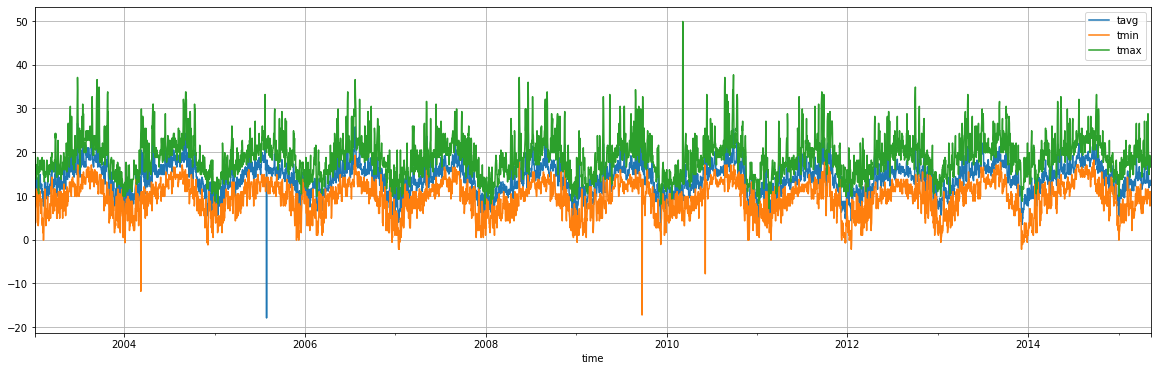

In [20]:
# Plot line chart including average, minimum and maximum temperature
plt.rcParams["figure.figsize"] = (20,6)
daily_data.plot(y=['tavg', 'tmin', 'tmax'])
plt.grid()
plt.show()

### Visualize Pressure

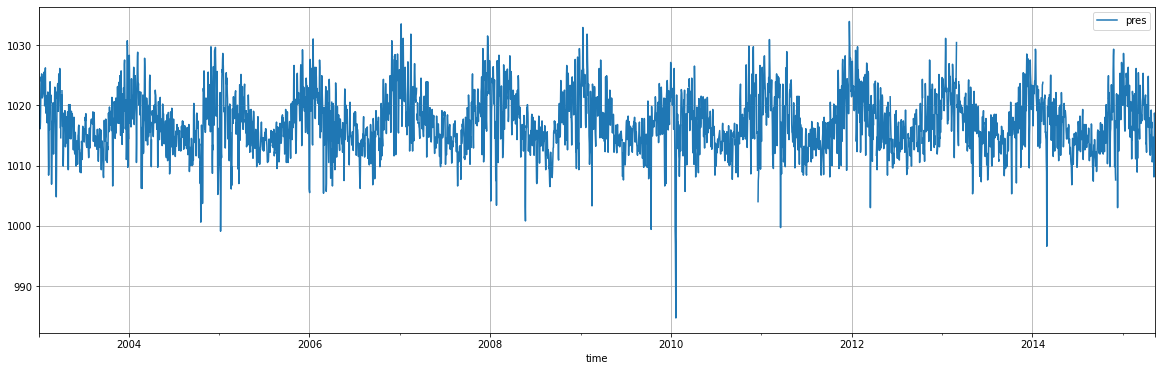

In [21]:
# Plot line chart including average, minimum and maximum temperature
plt.rcParams["figure.figsize"] = (20,6)
daily_data.plot(y=['pres'])
plt.grid()
plt.show()

### Visualize Precipitation

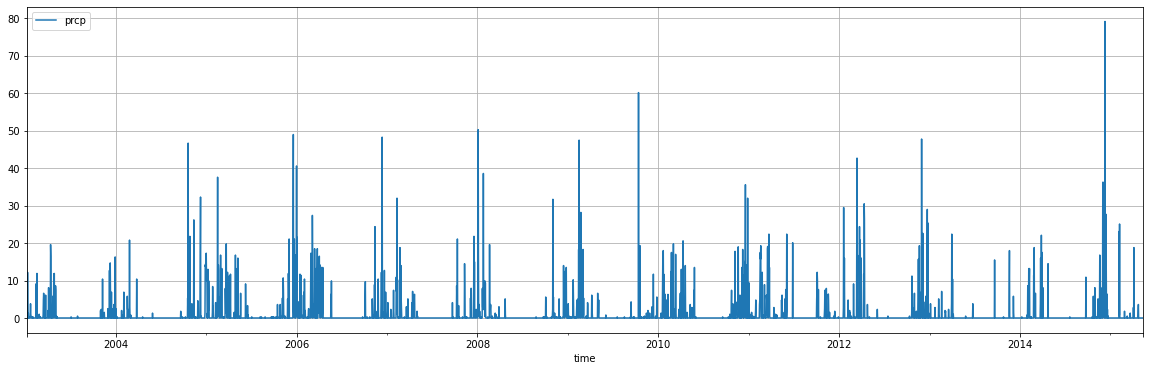

In [22]:
# Plot line chart including average, minimum and maximum temperature
plt.rcParams["figure.figsize"] = (20,6)
daily_data.plot(y=['prcp'])
plt.grid()
plt.show()

### Wind Speed

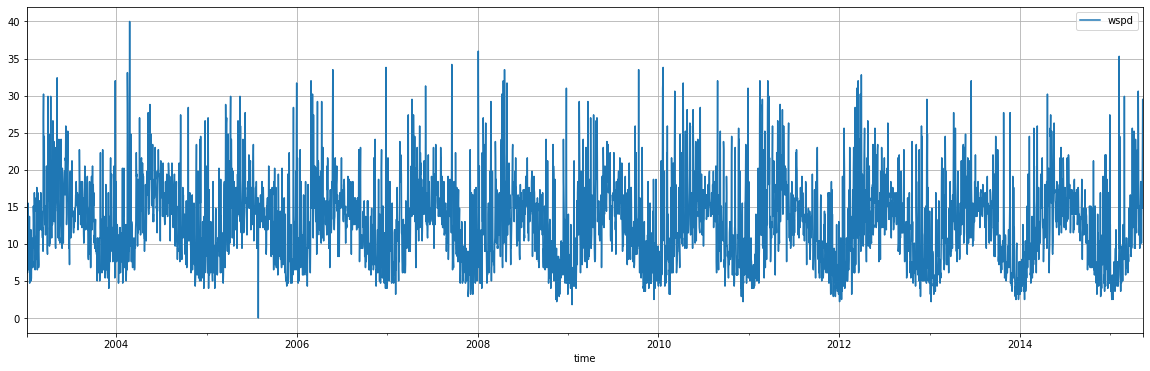

In [23]:
plt.rcParams["figure.figsize"] = (20,6)
daily_data.plot(y=['wspd'])
plt.grid()
plt.show()

# Process and Join Weather Data

In [24]:
daily_weather_data = daily_data.copy().reset_index()
daily_weather_data.rename(columns={"time": "DATE"}, inplace = True)

# select columns
daily_weather_data = daily_weather_data[["DATE","tavg",
                                         "tmin","tmax",
                                         "prcp","wspd",
                                        "pres","tsun"]]


daily_weather_data["DATE"] = pd.to_datetime(daily_weather_data["DATE"])

display(daily_weather_data.head())

,DATE,tavg,tmin,tmax,prcp,wspd,pres,tsun
0,2003-01-06,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
1,2003-01-07,11.0,3.8,17.7,0.0,7.6,1019.9,0.0
2,2003-01-08,9.3,4.3,14.3,0.0,6.1,1016.7,0.0
3,2003-01-09,11.6,9.3,13.8,12.2,10.8,1016.1,0.0
4,2003-01-10,13.8,11.6,16.0,4.3,15.5,1017.2,0.0


In [25]:
sfcrime_weather_df = sfcrime_joined_feat.merge(daily_weather_data, how = "inner", on = "DATE")

display(sfcrime_weather_df.shape)
display(sfcrime_weather_df.head())

(768438, 14)

,DATE,HEX_ID,Category,CATEGORY_COUNT,STREET_COUNT,BUILDING_COUNT,INTERSECTION_COUNT,tavg,tmin,tmax,prcp,wspd,pres,tsun
0,2003-01-06,8a283080c907fff,VANDALISM,1,43,311,43,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
1,2003-01-06,8a283080ca37fff,LARCENY/THEFT,1,48,108,48,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
2,2003-01-06,8a283080cb1ffff,LARCENY/THEFT,1,85,91,85,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
3,2003-01-06,8a2830820a17fff,ASSAULT,1,0,823,0,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
4,2003-01-06,8a2830820a17fff,OTHER OFFENSES,1,0,823,0,14.3,8.2,19.9,0.0,13.0,1019.3,0.0


## Write Final Data to CSV

In [26]:
sfcrime_weather_df.to_csv(os.path.join(DATA_DIR, "SF_Crime_Weather.csv"), index = False)

# Prepare Time Series

## Select High Frequency Categories

In [27]:
cat_cnt = unique_vals("Category")
cat_list = list(cat_cnt.loc[cat_cnt["Count"] >= 1000]["Category"])
cat_list[:4]

['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT']

In [28]:
sfcrime_weather_ts_df = sfcrime_weather_df.copy()
sfcrime_weather_ts_df = sfcrime_weather_ts_df.loc[sfcrime_weather_ts_df["Category"].isin(cat_list)]
sfcrime_weather_ts_df = sfcrime_weather_ts_df.sort_values(by = ["DATE"])
sfcrime_weather_ts_df.to_csv(os.path.join(DATA_DIR, "SF_Crime_TS_Weather.csv"), index = False)

display(sfcrime_weather_ts_df.shape)
display(sfcrime_weather_ts_df.head())

(766195, 14)

,DATE,HEX_ID,Category,CATEGORY_COUNT,STREET_COUNT,BUILDING_COUNT,INTERSECTION_COUNT,tavg,tmin,tmax,prcp,wspd,pres,tsun
0,2003-01-06,8a283080c907fff,VANDALISM,1,43,311,43,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
237,2003-01-06,8a283082c55ffff,SECONDARY CODES,1,229,68,229,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
236,2003-01-06,8a283082c55ffff,OTHER OFFENSES,2,229,68,229,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
235,2003-01-06,8a283082c55ffff,ASSAULT,1,229,68,229,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
234,2003-01-06,8a283082c4c7fff,SUSPICIOUS OCC,1,0,5178,0,14.3,8.2,19.9,0.0,13.0,1019.3,0.0


## Remove `Prostitution`

In [29]:
sfcrime_weather_ts_df2 =sfcrime_weather_ts_df.copy()
sfcrime_weather_ts_df2 = sfcrime_weather_ts_df2.loc[sfcrime_weather_ts_df2["Category"] != "PROSTITUTION"]

sfcrime_weather_ts_df2.to_csv(os.path.join(DATA_DIR, "SF_Crime_TS_NoProst.csv"), index = False)

display(sfcrime_weather_ts_df2.shape)
display(sfcrime_weather_ts_df2.head())

(762054, 14)

,DATE,HEX_ID,Category,CATEGORY_COUNT,STREET_COUNT,BUILDING_COUNT,INTERSECTION_COUNT,tavg,tmin,tmax,prcp,wspd,pres,tsun
0,2003-01-06,8a283080c907fff,VANDALISM,1,43,311,43,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
237,2003-01-06,8a283082c55ffff,SECONDARY CODES,1,229,68,229,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
236,2003-01-06,8a283082c55ffff,OTHER OFFENSES,2,229,68,229,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
235,2003-01-06,8a283082c55ffff,ASSAULT,1,229,68,229,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
234,2003-01-06,8a283082c4c7fff,SUSPICIOUS OCC,1,0,5178,0,14.3,8.2,19.9,0.0,13.0,1019.3,0.0
